In [1]:
%matplotlib notebook
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
import plotly.express as px
import seaborn as sns
import numpy as np

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation
import libpysal as lps

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# California Power Plant Map

In [2]:
#import data
cpp = gpd.read_file('California_Power_Plants_MP Cleaned 3.1.21.csv')

Explore data

In [3]:
type(cpp)

geopandas.geodataframe.GeoDataFrame

In [4]:
cpp.shape

(871, 25)

In [5]:
cpp.head(10)

Plant_ID        Plant_Label     MW Gross_MWh Net_MWh General_Fuel  \
0    E0006  Burney Mtn. Power     11                        Biomass   
1    E0056   Mt. Lassen Power   11.4                        Biomass   
2    E0113           Commerce   11.5                        Biomass   
3    E0026      Collins Pine      12  15398.03    8763      Biomass   
4    E0018      Chowchilla II   12.5  79062.01   67181      Biomass   
5    E0017       Chowchilla I   12.5                        Biomass   
6    E0007            El Nido   12.5     74997   63344      Biomass   
7    E0082   SPI - Susanville  12.65                        Biomass   
8    E0243    Roseburg Forest  13.39     59298   56150      Biomass   
9    E0089     Soledad Energy   13.4                        Biomass   

      Status Online_Year REAT_ID       County  ...     Congressional_District  \
0  Operating        1985     C-3       Shasta  ...   Congressional District 1   
1  Operating        1985     C-4       Lassen  ...   Congressional District 1   
2  Operating        1986    F-11  Los Angeles  ...  Congressional District 40   
3  Operating        1985     C-4       Plumas  ...   Congressional District 1   
4    Standby        2008     D-8       Madera  ...  Congressional District 16   
5  Operating                 D-8       Madera  ...  Congressional District 16   
6    Standby        2008     D-8       Merced  ...  Congressional District 16   
7  Operating        1985     D-4       Lassen  ...   Congressional District 1   
8  Operating        2011     B-3     Siskiyou  ...   Congressional District 1   
9  Operating        2000     C-9     Monterey  ...  Congressional District 20   

      CES30_PercentileRange CES30_Percentile     Longitude     Latitude  \
0                    50-55%               51  -121.6395876  40.91000072   
1                    30-35%               30  -121.0178306  40.29741968   
2  95-100% (highest scores)               97  -118.1537915  33.99486138   
3                    20-25%               24  -121.2439679  40.30207759   
4                    70-75%               72  -120.2488396  37.10692537   
5                    70-75%               72  -120.2483803  37.10726315   
6                    80-85%               81  -120.4905055  37.18700309   
7                    25-30%               29  -120.6453826  40.40864222   
8                    60-65%               64  -122.3769502  41.43431054   
9                    45-50%               47  -121.3156098  36.41629355   

  Operation_Job Capacity_Factor Income_Percent  \
0                                           61   
1                                           66   
2                                           75   
3                    0.08313411             70   
4                    0.61184882             48   
5                                           48   
6                    0.57690346             73   
7                                           44   
8                    0.47739389             71   
9                                           64   

                                 Project_Location geometry  
0  Neither Low Income Nor Disadvantaged Community     None  
1  Neither Low Income Nor Disadvantaged Community     None  
2                         Disadvantaged Community     None  
3  Neither Low Income Nor Disadvantaged Community     None  
4                                      Low Income     None  
5                                      Low Income     None  
6                         Disadvantaged Community     None  
7                                      Low Income     None  
8  Neither Low Income Nor Disadvantaged Community     None  
9  Neither Low Income Nor Disadvantaged Community     None  

[10 rows x 25 columns]

In [6]:
cpp.dtypes

Plant_ID                    object
Plant_Label                 object
MW                          object
Gross_MWh                   object
Net_MWh                     object
General_Fuel                object
Status                      object
Online_Year                 object
REAT_ID                     object
County                      object
State_                      object
Renewable_Energy            object
Jobs                        object
Senate_District             object
Assembly_District           object
Congressional_District      object
CES30_PercentileRange       object
CES30_Percentile            object
Longitude                   object
Latitude                    object
Operation_Job               object
Capacity_Factor             object
Income_Percent              object
Project_Location            object
geometry                  geometry
dtype: object

In [7]:
cpp.columns = ['Plant_ID',
 'Name',
 'MW',
 'Gross_MWh',
 'Net_MWh',
 'Fuel_Type',
 'Status',
 'Online_Year',
 'REAT_ID',
 'County',
 'State',
 'Renewable_Energy',
 'Jobs',
 'Senate_District',
 'Assembly_District',
 'Congressional_District',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Lon',
 'Lat',
 'Operation_Job',
 'Capacity_Factor',
 'Income_Percent',
 'Project_Location',
 'geometry']

In [8]:
# define variable with desired columns 
desired_columns = ['Plant_ID',
 'Name',
 'MW',
 'Fuel_Type',
 'Status',
 'County',
 'State',
 'Renewable_Energy',
 'Jobs',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Lon',
 'Lat',
 'Income_Percent',
 'Project_Location',
 'geometry']

# redefine dataframe with desired columns
cpp_trim = cpp[desired_columns].copy()

# check new dataframe
cpp_trim

Plant_ID               Name      MW Fuel_Type     Status       County  \
0      E0006  Burney Mtn. Power      11   Biomass  Operating       Shasta   
1      E0056   Mt. Lassen Power    11.4   Biomass  Operating       Lassen   
2      E0113           Commerce    11.5   Biomass  Operating  Los Angeles   
3      E0026      Collins Pine       12   Biomass  Operating       Plumas   
4      E0018      Chowchilla II    12.5   Biomass    Standby       Madera   
..       ...                ...     ...       ...        ...          ...   
866    W0414    North Sky River     162      Wind  Operating         Kern   
867    W0389             Alta V     168      Wind  Operating         Kern   
868    W0415     Pinyon Pines I     168      Wind  Operating         Kern   
869    W0420            Manzana     189      Wind  Operating         Kern   
870    W0409   Ocotillo Express  265.44      Wind  Operating     Imperial   

    State Renewable_Energy   Jobs     CES30_PercentileRange CES30_Percentile  \
0      CA                1   19.8                    50-55%               51   
1      CA                1   20.5                    30-35%               30   
2      CA                1   20.7  95-100% (highest scores)               97   
3      CA                1   21.6                    20-25%               24   
4      CA                1   22.5                    70-75%               72   
..    ...              ...    ...                       ...              ...   
866    CA                1  239.8                    55-60%               58   
867    CA                1  248.6                    75-80%               79   
868    CA                1  248.6                    75-80%               79   
869    CA                1  279.7                    70-75%               71   
870    CA                1  392.9                    65-70%               67   

              Lon          Lat Income_Percent  \
0    -121.6395876  40.91000072             61   
1    -121.0178306  40.29741968             66   
2    -118.1537915  33.99486138             75   
3    -121.2439679  40.30207759             70   
4    -120.2488396  37.10692537             48   
..            ...          ...            ...   
866  -118.1804757   35.3502891             60   
867  -118.2376542  35.00079663             51   
868  -118.2143789  35.03973709             51   
869  -118.4678447  34.94433117             96   
870  -116.0493859  32.75979594             59   

                                   Project_Location geometry  
0    Neither Low Income Nor Disadvantaged Community     None  
1    Neither Low Income Nor Disadvantaged Community     None  
2                           Disadvantaged Community     None  
3    Neither Low Income Nor Disadvantaged Community     None  
4                                        Low Income     None  
..                                              ...      ...  
866                                      Low Income     None  
867          Low Income and Disadvantaged Community     None  
868          Low Income and Disadvantaged Community     None  
869  Neither Low Income Nor Disadvantaged Community     None  
870                                      Low Income     None  

[871 rows x 16 columns]

In [9]:
# Convert coordinates to floats. 
cpp_trim.Lon = cpp_trim.Lon.astype('float')
cpp_trim.Lat = cpp_trim.Lat.astype('float')

In [10]:
# Reproject dataframe
cpp_trim = gpd.GeoDataFrame(cpp_trim, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(cpp_trim.Lon, cpp_trim.Lat))

cpp_trim.head(5)

Plant_ID               Name    MW Fuel_Type     Status       County State  \
0    E0006  Burney Mtn. Power    11   Biomass  Operating       Shasta    CA   
1    E0056   Mt. Lassen Power  11.4   Biomass  Operating       Lassen    CA   
2    E0113           Commerce  11.5   Biomass  Operating  Los Angeles    CA   
3    E0026      Collins Pine     12   Biomass  Operating       Plumas    CA   
4    E0018      Chowchilla II  12.5   Biomass    Standby       Madera    CA   

  Renewable_Energy  Jobs     CES30_PercentileRange CES30_Percentile  \
0                1  19.8                    50-55%               51   
1                1  20.5                    30-35%               30   
2                1  20.7  95-100% (highest scores)               97   
3                1  21.6                    20-25%               24   
4                1  22.5                    70-75%               72   

          Lon        Lat Income_Percent  \
0 -121.639588  40.910001             61   
1 -121.017831  40.297420             66   
2 -118.153791  33.994861             75   
3 -121.243968  40.302078             70   
4 -120.248840  37.106925             48   

                                 Project_Location                     geometry  
0  Neither Low Income Nor Disadvantaged Community  POINT (-121.63959 40.91000)  
1  Neither Low Income Nor Disadvantaged Community  POINT (-121.01783 40.29742)  
2                         Disadvantaged Community  POINT (-118.15379 33.99486)  
3  Neither Low Income Nor Disadvantaged Community  POINT (-121.24397 40.30208)  
4                                      Low Income  POINT (-120.24884 37.10693)

In [11]:
# check crs type
cpp_trim.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Demographics (CES)

In [12]:
# import demographics dataset
gdf_ces = gpd.read_file('CES3June2018Update.shp')

Explore data

In [13]:
type(gdf_ces)

geopandas.geodataframe.GeoDataFrame

In [14]:
gdf_ces.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - California
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
gdf_ces.shape

(8035, 71)

In [16]:
#define variable with desired columns 
columns_to_keep = ['tract', 'pop2010', 'California', 'ZIP', 'City', 'Longitude', 'Latitude', 'CIscore', 'CIscoreP', 'edu', 'eduP', 'pov', 'povP', 'unemp', 'unempP', 'Pop_11_64_', 'Elderly_ov', 'Hispanic_p', 'White_pct', 'African_Am', 'Native_Ame', 'Asian_Amer', 'Other_pct', 'geometry']

#redfine dataframe with desired columns 
gdf_ces = gdf_ces[columns_to_keep]

# check to make sure 
gdf_ces.head()

tract  pop2010     California    ZIP         City   Longitude  \
0  6.083002e+09     3930  Santa Barbara  93454  Santa Maria -120.427059   
1  6.083002e+09    11406  Santa Barbara  93455  Santa Maria -120.478083   
2  6.083002e+09     2084  Santa Barbara  93454  Santa Maria -120.426777   
3  6.083002e+09     4375  Santa Barbara  93455  Santa Maria -120.410028   
4  6.083002e+09     3826  Santa Barbara  93455  Santa Maria -120.427716   

    Latitude  CIscore  CIscoreP   edu  ...  unempP  Pop_11_64_  Elderly_ov  \
0  34.930669    29.51        59  24.8  ...      32        70.5        13.1   
1  34.928796    33.17        65  46.0  ...      61        73.2         6.2   
2  34.942111    22.85        45  26.2  ...       7        72.5        13.2   
3  34.871428     4.45         2   6.1  ...      47        74.7        14.4   
4  34.872288     5.28         3  12.1  ...      32        73.6        15.9   

   Hispanic_p  White_pct  African_Am  Native_Ame  Asian_Amer  Other_pct  \
0        57.5       31.3         1.9         0.5         7.2        1.6   
1        74.0       17.4         1.4         0.2         5.5        1.6   
2        52.2       40.9         0.8         0.5         2.9        2.6   
3        20.0       71.9         1.0         0.6         4.0        2.6   
4        25.7       65.4         1.5         0.8         3.5        3.2   

                                            geometry  
0  POLYGON ((-39795.070 -341919.191, -38126.384 -...  
1  POLYGON ((-39795.070 -341919.191, -39803.632 -...  
2  POLYGON ((-38115.747 -341130.248, -38126.384 -...  
3  POLYGON ((-37341.662 -348530.437, -37252.307 -...  
4  POLYGON ((-39465.107 -348499.262, -38244.305 -...  

[5 rows x 24 columns]

In [17]:
list(gdf_ces)

['tract',
 'pop2010',
 'California',
 'ZIP',
 'City',
 'Longitude',
 'Latitude',
 'CIscore',
 'CIscoreP',
 'edu',
 'eduP',
 'pov',
 'povP',
 'unemp',
 'unempP',
 'Pop_11_64_',
 'Elderly_ov',
 'Hispanic_p',
 'White_pct',
 'African_Am',
 'Native_Ame',
 'Asian_Amer',
 'Other_pct',
 'geometry']

## Tracts by race

In [18]:
# create list of races
ces_races = ['Hispanic_p', 'White_pct', 'African_Am', 'Asian_Amer']

In [19]:
# reproject dataframes to web mercator
gdf_ces = gdf_ces.to_crs(epsg=3857)

cpp_trim = cpp_trim.to_crs(epsg=3857)

In [20]:
# convert CES30_Percentile to integer
cpp_trim['CES30_Percentile'] = pd.to_numeric(cpp_trim['CES30_Percentile'])

In [21]:
# convert MW to integer
cpp_trim['MW'] = pd.to_numeric(cpp_trim['MW'])

In [22]:
# create dataframe for renewable energy
cpp_ce = cpp_trim[cpp_trim.Renewable_Energy != '0']

In [23]:
# check work
cpp_ce.shape

(555, 16)

In [24]:
# create dataframe for fossil fuel energy
cpp_ff = cpp_trim[cpp_trim.Renewable_Energy != '1']

In [25]:
cpp_ff.shape

(316, 16)

In [26]:
# create new variable for disadvantaged community
cpp_trim['Community type'] = [0 if x =='Neither Low Income Nor Disadvantaged Community' else 1 for x in cpp_trim['Project_Location']]

In [27]:
list(cpp_trim)

['Plant_ID',
 'Name',
 'MW',
 'Fuel_Type',
 'Status',
 'County',
 'State',
 'Renewable_Energy',
 'Jobs',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Lon',
 'Lat',
 'Income_Percent',
 'Project_Location',
 'geometry',
 'Community type']

In [28]:
# convert to integer
cpp_trim['Renewable_Energy'] = pd.to_numeric(cpp_trim['Renewable_Energy'])

In [29]:
# convert to integer
cpp_trim['Community type'] = pd.to_numeric(cpp_trim['Community type'])

In [30]:
# check work
cpp_trim.dtypes

Plant_ID                   object
Name                       object
MW                        float64
Fuel_Type                  object
Status                     object
County                     object
State                      object
Renewable_Energy            int64
Jobs                       object
CES30_PercentileRange      object
CES30_Percentile          float64
Lon                       float64
Lat                       float64
Income_Percent             object
Project_Location           object
geometry                 geometry
Community type              int64
dtype: object

In [31]:
# create CPP dataframe for LA
cpp_LA = cpp_trim[cpp_trim.County == 'Los Angeles']

In [32]:
cpp_LA.head()

Plant_ID                  Name     MW Fuel_Type     Status       County  \
2     E0113              Commerce  11.50   Biomass  Operating  Los Angeles   
11    G1072          Miller Coors  14.86   Biomass  Operating  Los Angeles   
33    E0112  SE Resource Recovery  34.60   Biomass  Operating  Los Angeles   
36    E0212          Total Energy  38.40   Biomass  Operating  Los Angeles   
43    E0008             Irwindale  80.00   Biomass    Unknown  Los Angeles   

   State  Renewable_Energy   Jobs     CES30_PercentileRange  CES30_Percentile  \
2     CA                 1   20.7  95-100% (highest scores)              97.0   
11    CA                 1   26.7                    90-95%              93.0   
33    CA                 1   62.3                                         NaN   
36    CA                 1   69.1                    75-80%              75.0   
43    CA                 1  144.0                    90-95%              93.0   

           Lon        Lat Income_Percent         Project_Location  \
2  -118.153791  33.994861             75  Disadvantaged Community   
11 -117.939880  34.126674             81                            
33 -118.240365  33.759271                                           
36 -118.284792  33.801817            148  Disadvantaged Community   
43 -117.936516  34.107121             81  Disadvantaged Community   

                             geometry  Community type  
2   POINT (-13152819.905 4028112.056)               1  
11  POINT (-13129007.386 4045823.956)               1  
33  POINT (-13162457.234 3996523.569)               1  
36  POINT (-13167402.814 4002221.798)               1  
43  POINT (-13128632.885 4043194.779)               1

In [33]:
# create CES dataframe for LA
ces_LA = gdf_ces[gdf_ces.California == 'Los Angeles']
ces_LA.shape

(2343, 24)

In [34]:
gdf_ces.shape

(8035, 24)

In [35]:
# create dataframe for fossil fuel energy  in LA
cpp_ff_LA = cpp_LA[cpp_LA.Renewable_Energy != '1']

/opt/conda/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [36]:
# create dataframe for renewable energy in LA
cpp_ce_LA = cpp_LA[cpp_LA.Renewable_Energy == '1']

# Data analysis

## Stacked bar chart

Compare renewable power plants to fossil fuel plants across environmental burden (CES) score

First, create new variable and group CES scores into percentiles.

In [37]:
# first percentile
cpp_trim.loc[cpp_trim['CES30_Percentile'] < 25, 'CES30_Percentile_Group'] = '1st Percentile'

In [38]:
# check work
cpp_trim.head(10)

Plant_ID               Name     MW Fuel_Type     Status       County State  \
0    E0006  Burney Mtn. Power  11.00   Biomass  Operating       Shasta    CA   
1    E0056   Mt. Lassen Power  11.40   Biomass  Operating       Lassen    CA   
2    E0113           Commerce  11.50   Biomass  Operating  Los Angeles    CA   
3    E0026      Collins Pine   12.00   Biomass  Operating       Plumas    CA   
4    E0018      Chowchilla II  12.50   Biomass    Standby       Madera    CA   
5    E0017       Chowchilla I  12.50   Biomass  Operating       Madera    CA   
6    E0007            El Nido  12.50   Biomass    Standby       Merced    CA   
7    E0082   SPI - Susanville  12.65   Biomass  Operating       Lassen    CA   
8    E0243    Roseburg Forest  13.39   Biomass  Operating     Siskiyou    CA   
9    E0089     Soledad Energy  13.40   Biomass  Operating     Monterey    CA   

   Renewable_Energy  Jobs     CES30_PercentileRange  CES30_Percentile  \
0                 1  19.8                    50-55%              51.0   
1                 1  20.5                    30-35%              30.0   
2                 1  20.7  95-100% (highest scores)              97.0   
3                 1  21.6                    20-25%              24.0   
4                 1  22.5                    70-75%              72.0   
5                 1  22.5                    70-75%              72.0   
6                 1  22.5                    80-85%              81.0   
7                 1  22.8                    25-30%              29.0   
8                 1  24.1                    60-65%              64.0   
9                 1  24.1                    45-50%              47.0   

          Lon        Lat Income_Percent  \
0 -121.639588  40.910001             61   
1 -121.017831  40.297420             66   
2 -118.153791  33.994861             75   
3 -121.243968  40.302078             70   
4 -120.248840  37.106925             48   
5 -120.248380  37.107263             48   
6 -120.490505  37.187003             73   
7 -120.645383  40.408642             44   
8 -122.376950  41.434311             71   
9 -121.315610  36.416294             64   

                                 Project_Location  \
0  Neither Low Income Nor Disadvantaged Community   
1  Neither Low Income Nor Disadvantaged Community   
2                         Disadvantaged Community   
3  Neither Low Income Nor Disadvantaged Community   
4                                      Low Income   
5                                      Low Income   
6                         Disadvantaged Community   
7                                      Low Income   
8  Neither Low Income Nor Disadvantaged Community   
9  Neither Low Income Nor Disadvantaged Community   

                            geometry  Community type CES30_Percentile_Group  
0  POINT (-13540856.952 4999075.840)               0                    NaN  
1  POINT (-13471643.279 4909257.094)               0                    NaN  
2  POINT (-13152819.905 4028112.056)               1                    NaN  
3  POINT (-13496816.768 4909936.963)               0         1st Percentile  
4  POINT (-13386039.593 4454021.303)               1                    NaN  
5  POINT (-13385988.464 4454068.452)               1                    NaN  
6  POINT (-13412941.718 4465204.759)               1                    NaN  
7  POINT (-13430182.558 4925503.963)               1                    NaN  
8  POINT (-13622939.781 5076614.978)               0                    NaN  
9  POINT (-13504791.908 4358054.953)               0                    NaN

In [39]:
# 4th percentile
cpp_trim.loc[cpp_trim['CES30_Percentile'] > 74, 'CES30_Percentile_Group'] = '4th Percentile'

In [40]:
print(cpp_trim.CES30_Percentile_Group)

0                 NaN
1                 NaN
2      4th Percentile
3      1st Percentile
4                 NaN
            ...      
866               NaN
867    4th Percentile
868    4th Percentile
869               NaN
870               NaN
Name: CES30_Percentile_Group, Length: 871, dtype: object


In [41]:
# 2nd percentile
cpp_trim.loc[(cpp_trim['CES30_Percentile'] <50) & 
             (cpp_trim['CES30_Percentile'] >24), 'CES30_Percentile_Group'] = '2nd Percentile' 

In [42]:
# 3rd percentile
cpp_trim.loc[(cpp_trim['CES30_Percentile'] <75) & 
             (cpp_trim['CES30_Percentile'] >49), 'CES30_Percentile_Group'] = '3rd Percentile' 

In [43]:
print(cpp_trim.CES30_Percentile_Group)

0      3rd Percentile
1      2nd Percentile
2      4th Percentile
3      1st Percentile
4      3rd Percentile
            ...      
866    3rd Percentile
867    4th Percentile
868    4th Percentile
869    3rd Percentile
870    3rd Percentile
Name: CES30_Percentile_Group, Length: 871, dtype: object


In [44]:
# add count of percentiles
cpp_trim.groupby(['CES30_Percentile_Group']).count()

Plant_ID  Name   MW  Fuel_Type  Status  County  State  \
CES30_Percentile_Group                                                          
1st Percentile               112   112  112        112     112     112    112   
2nd Percentile               185   185  185        185     185     185    185   
3rd Percentile               241   241  241        241     241     241    241   
4th Percentile               278   278  278        278     278     278    278   

                        Renewable_Energy  Jobs  CES30_PercentileRange  \
CES30_Percentile_Group                                                  
1st Percentile                       112   112                    112   
2nd Percentile                       185   185                    185   
3rd Percentile                       241   241                    241   
4th Percentile                       278   278                    278   

                        CES30_Percentile  Lon  Lat  Income_Percent  \
CES30_Percentile_Group                                               
1st Percentile                       112  112  112             112   
2nd Percentile                       185  185  185             185   
3rd Percentile                       241  241  241             241   
4th Percentile                       278  278  278             278   

                        Project_Location  geometry  Community type  
CES30_Percentile_Group                                              
1st Percentile                       112       112             112  
2nd Percentile                       185       185             185  
3rd Percentile                       241       241             241  
4th Percentile                       278       278             278

In [45]:
# create new dataframe for grouped percentiles and count
cpp_grouped=cpp_trim.groupby(['CES30_Percentile_Group','Renewable_Energy']).count()[['Plant_ID']]
cpp_grouped.head(50)

Plant_ID
CES30_Percentile_Group Renewable_Energy          
1st Percentile         0                       20
                       1                       92
2nd Percentile         0                       36
                       1                      149
3rd Percentile         0                       92
                       1                      149
4th Percentile         0                      127
                       1                      151

In [46]:
cpp_flat = cpp_grouped.reset_index()
cpp_flat

CES30_Percentile_Group  Renewable_Energy  Plant_ID
0         1st Percentile                 0        20
1         1st Percentile                 1        92
2         2nd Percentile                 0        36
3         2nd Percentile                 1       149
4         3rd Percentile                 0        92
5         3rd Percentile                 1       149
6         4th Percentile                 0       127
7         4th Percentile                 1       151

In [47]:
# rename columns
cpp_flat = cpp_flat.rename(columns={'Plant_ID':'count'})

In [48]:
# convert Renewable_Energy to string
cpp_flat = cpp_flat.astype({'Renewable_Energy':str})

In [49]:
cpp_flat.dtypes

CES30_Percentile_Group    object
Renewable_Energy          object
count                      int64
dtype: object

In [50]:
cpp_flat.columns = ['CES_Percentile', 'Energy Type','count']

In [51]:
# check work
cpp_flat.head(10)

CES_Percentile Energy Type  count
0  1st Percentile           0     20
1  1st Percentile           1     92
2  2nd Percentile           0     36
3  2nd Percentile           1    149
4  3rd Percentile           0     92
5  3rd Percentile           1    149
6  4th Percentile           0    127
7  4th Percentile           1    151

In [52]:
# rename renewable energy values
cpp_flat['Energy Type'].replace({'1':'Renewable','0':'Fossil fuel'}, inplace=True)
print(cpp_flat)

   CES_Percentile  Energy Type  count
0  1st Percentile  Fossil fuel     20
1  1st Percentile    Renewable     92
2  2nd Percentile  Fossil fuel     36
3  2nd Percentile    Renewable    149
4  3rd Percentile  Fossil fuel     92
5  3rd Percentile    Renewable    149
6  4th Percentile  Fossil fuel    127
7  4th Percentile    Renewable    151


In [53]:
# make basic bar chart
px.bar(cpp_flat,
       x='CES_Percentile',
       y='count'
      )

In [54]:
# make a stacked bar chart - Percentile
px.bar(cpp_flat,
       x='CES_Percentile',
       y='count',
       color='Energy Type'
      )

In [55]:
# make a stacked bar chart - Renewable Energy
fig = px.bar(cpp_flat,
             x='Energy Type',
             y='count',
             color='CES_Percentile',
             title='Energy type by Environmental Burden'
            )

fig.show()

In [56]:
# write to html for storymap display
fig.write_html("Energy_CES_Stacked.html")

# Spatial analysis

In [57]:
# create CES new dataframe for spatial analysis
ces_spatial = gdf_ces.copy()

In [58]:
# check work
ces_spatial.head()

tract  pop2010     California    ZIP         City   Longitude  \
0  6.083002e+09     3930  Santa Barbara  93454  Santa Maria -120.427059   
1  6.083002e+09    11406  Santa Barbara  93455  Santa Maria -120.478083   
2  6.083002e+09     2084  Santa Barbara  93454  Santa Maria -120.426777   
3  6.083002e+09     4375  Santa Barbara  93455  Santa Maria -120.410028   
4  6.083002e+09     3826  Santa Barbara  93455  Santa Maria -120.427716   

    Latitude  CIscore  CIscoreP   edu  ...  unempP  Pop_11_64_  Elderly_ov  \
0  34.930669    29.51        59  24.8  ...      32        70.5        13.1   
1  34.928796    33.17        65  46.0  ...      61        73.2         6.2   
2  34.942111    22.85        45  26.2  ...       7        72.5        13.2   
3  34.871428     4.45         2   6.1  ...      47        74.7        14.4   
4  34.872288     5.28         3  12.1  ...      32        73.6        15.9   

   Hispanic_p  White_pct  African_Am  Native_Ame  Asian_Amer  Other_pct  \
0        57.5       31.3         1.9         0.5         7.2        1.6   
1        74.0       17.4         1.4         0.2         5.5        1.6   
2        52.2       40.9         0.8         0.5         2.9        2.6   
3        20.0       71.9         1.0         0.6         4.0        2.6   
4        25.7       65.4         1.5         0.8         3.5        3.2   

                                            geometry  
0  POLYGON ((-13406867.403 4155533.467, -13404832...  
1  POLYGON ((-13406867.403 4155533.467, -13406866...  
2  POLYGON ((-13404823.800 4156507.697, -13404832...  
3  POLYGON ((-13403840.848 4147463.430, -13403731...  
4  POLYGON ((-13406428.470 4147490.027, -13404940...  

[5 rows x 24 columns]

In [59]:
# trim the census tracts data to desired columns
ces_spatial = ces_spatial[['tract','California','geometry']]

# rename the columns
ces_spatial.columns = ['FIPS','County','geometry']

In [60]:
ces_spatial.head()

FIPS         County  \
0  6.083002e+09  Santa Barbara   
1  6.083002e+09  Santa Barbara   
2  6.083002e+09  Santa Barbara   
3  6.083002e+09  Santa Barbara   
4  6.083002e+09  Santa Barbara   

                                            geometry  
0  POLYGON ((-13406867.403 4155533.467, -13404832...  
1  POLYGON ((-13406867.403 4155533.467, -13406866...  
2  POLYGON ((-13404823.800 4156507.697, -13404832...  
3  POLYGON ((-13403840.848 4147463.430, -13403731...  
4  POLYGON ((-13406428.470 4147490.027, -13404940...

In [61]:
# create CPP new dataframe for spatial analysis
cpp_spatial = cpp.copy()

In [62]:
# check work
cpp_spatial.head()

Plant_ID               Name    MW Gross_MWh Net_MWh Fuel_Type     Status  \
0    E0006  Burney Mtn. Power    11                     Biomass  Operating   
1    E0056   Mt. Lassen Power  11.4                     Biomass  Operating   
2    E0113           Commerce  11.5                     Biomass  Operating   
3    E0026      Collins Pine     12  15398.03    8763   Biomass  Operating   
4    E0018      Chowchilla II  12.5  79062.01   67181   Biomass    Standby   

  Online_Year REAT_ID       County  ...     Congressional_District  \
0        1985     C-3       Shasta  ...   Congressional District 1   
1        1985     C-4       Lassen  ...   Congressional District 1   
2        1986    F-11  Los Angeles  ...  Congressional District 40   
3        1985     C-4       Plumas  ...   Congressional District 1   
4        2008     D-8       Madera  ...  Congressional District 16   

      CES30_PercentileRange CES30_Percentile           Lon          Lat  \
0                    50-55%               51  -121.6395876  40.91000072   
1                    30-35%               30  -121.0178306  40.29741968   
2  95-100% (highest scores)               97  -118.1537915  33.99486138   
3                    20-25%               24  -121.2439679  40.30207759   
4                    70-75%               72  -120.2488396  37.10692537   

  Operation_Job Capacity_Factor Income_Percent  \
0                                           61   
1                                           66   
2                                           75   
3                    0.08313411             70   
4                    0.61184882             48   

                                 Project_Location geometry  
0  Neither Low Income Nor Disadvantaged Community     None  
1  Neither Low Income Nor Disadvantaged Community     None  
2                         Disadvantaged Community     None  
3  Neither Low Income Nor Disadvantaged Community     None  
4                                      Low Income     None  

[5 rows x 25 columns]

In [63]:
# project to web mercator
ces_spatial = ces_spatial.to_crs(epsg=3857)

In [64]:
# convert coordinates to floats
cpp_spatial.Lon = cpp_spatial.Lon.astype('float')
cpp_spatial.Lat = cpp_spatial.Lat.astype('float')

In [65]:
# Convert CPP data to geodataframe
cpp_spatial = gpd.GeoDataFrame(cpp_spatial, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(cpp_spatial.Lon, cpp_spatial.Lat))

cpp_spatial.head()

Plant_ID               Name    MW Gross_MWh Net_MWh Fuel_Type     Status  \
0    E0006  Burney Mtn. Power    11                     Biomass  Operating   
1    E0056   Mt. Lassen Power  11.4                     Biomass  Operating   
2    E0113           Commerce  11.5                     Biomass  Operating   
3    E0026      Collins Pine     12  15398.03    8763   Biomass  Operating   
4    E0018      Chowchilla II  12.5  79062.01   67181   Biomass    Standby   

  Online_Year REAT_ID       County  ...     Congressional_District  \
0        1985     C-3       Shasta  ...   Congressional District 1   
1        1985     C-4       Lassen  ...   Congressional District 1   
2        1986    F-11  Los Angeles  ...  Congressional District 40   
3        1985     C-4       Plumas  ...   Congressional District 1   
4        2008     D-8       Madera  ...  Congressional District 16   

      CES30_PercentileRange CES30_Percentile         Lon        Lat  \
0                    50-55%               51 -121.639588  40.910001   
1                    30-35%               30 -121.017831  40.297420   
2  95-100% (highest scores)               97 -118.153791  33.994861   
3                    20-25%               24 -121.243968  40.302078   
4                    70-75%               72 -120.248840  37.106925   

  Operation_Job Capacity_Factor Income_Percent  \
0                                           61   
1                                           66   
2                                           75   
3                    0.08313411             70   
4                    0.61184882             48   

                                 Project_Location                     geometry  
0  Neither Low Income Nor Disadvantaged Community  POINT (-121.63959 40.91000)  
1  Neither Low Income Nor Disadvantaged Community  POINT (-121.01783 40.29742)  
2                         Disadvantaged Community  POINT (-118.15379 33.99486)  
3  Neither Low Income Nor Disadvantaged Community  POINT (-121.24397 40.30208)  
4                                      Low Income  POINT (-120.24884 37.10693)  

[5 rows x 25 columns]

In [66]:
# check crs type
cpp_spatial.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [67]:
#reproject CES to web mercator. 
ces_spatial = ces_spatial.to_crs(epsg=3857)

In [68]:
#reproject CPP to web mercator
cpp_spatial = cpp_spatial.to_crs(epsg=3857)

# check work
print(cpp_spatial.crs)

epsg:3857


We're going to start our spatial statisticss. We need to start by creating new dataframes with counts for all power plants, for just clean energy plants, and for just fossil fuel plants, and then join them back to the main one.

In [69]:
# Spatial join of both datasets
join = gpd.sjoin(cpp_spatial, ces_spatial, how='left')
join.head(20)

Plant_ID                      Name     MW Gross_MWh Net_MWh Fuel_Type  \
0     E0006         Burney Mtn. Power     11                     Biomass   
1     E0056          Mt. Lassen Power   11.4                     Biomass   
2     E0113                  Commerce   11.5                     Biomass   
3     E0026             Collins Pine      12  15398.03    8763   Biomass   
4     E0018             Chowchilla II   12.5  79062.01   67181   Biomass   
5     E0017              Chowchilla I   12.5                     Biomass   
6     E0007                   El Nido   12.5     74997   63344   Biomass   
7     E0082          SPI - Susanville  12.65                     Biomass   
8     E0243           Roseburg Forest  13.39     59298   56150   Biomass   
9     E0089            Soledad Energy   13.4                     Biomass   
10    E0134            Modesto Energy     14                     Biomass   
11    G1072              Miller Coors  14.86  17967.39   17967   Biomass   
12    E0037            Humboldt Bay 2     15  44702.04   39379   Biomass   
13    E0025                   Plant 2     16  52040.21   50112   Biomass   
14    E0246  Imperial Valley Resource     18                     Biomass   
15    E0051      Wheelabrator Martell     18                     Biomass   
16    E0004             SPI - Lincoln   19.2    108289   92886   Biomass   
17    E0084            SPI - Loyalton     20                     Biomass   
18    E0078              SPI - Burney     20  89565.02   78895   Biomass   
19    E0048           Samoa Pulp Mill     20                     Biomass   

       Status Online_Year REAT_ID  County_left  ...         Lon        Lat  \
0   Operating        1985     C-3       Shasta  ... -121.639588  40.910001   
1   Operating        1985     C-4       Lassen  ... -121.017831  40.297420   
2   Operating        1986    F-11  Los Angeles  ... -118.153791  33.994861   
3   Operating        1985     C-4       Plumas  ... -121.243968  40.302078   
4     Standby        2008     D-8       Madera  ... -120.248840  37.106925   
5   Operating                 D-8       Madera  ... -120.248380  37.107263   
6     Standby        2008     D-8       Merced  ... -120.490505  37.187003   
7   Operating        1985     D-4       Lassen  ... -120.645383  40.408642   
8   Operating        2011     B-3     Siskiyou  ... -122.376950  41.434311   
9   Operating        2000     C-9     Monterey  ... -121.315610  36.416294   
10  Operating        1988     C-7   Stanislaus  ... -121.269414  37.539347   
11  Operating        2002          Los Angeles  ... -117.939880  34.126674   
12  Operating        1986     A-3     Humboldt  ... -124.203047  40.799433   
13  Operating        1993    F-12       Orange  ... -117.956863  33.638788   
14  Operating                H-13     Imperial  ... -115.512936  32.906699   
15  Operating        1986     C-6       Amador  ... -120.808537  38.368121   
16  Operating        1997     C-6       Placer  ... -121.309752  38.903104   
17  Operating        1989     D-5       Sierra  ... -120.239729  39.670113   
18  Operating        1986     C-3       Shasta  ... -121.701631  40.876516   
19  Operating        1965     A-3     Humboldt  ... -124.195764  40.805249   

   Operation_Job Capacity_Factor Income_Percent  \
0                                            61   
1                                            66   
2                                            75   
3                     0.08313411             70   
4                     0.61184882             48   
5                                            48   
6                     0.57690346             73   
7                                            44   
8                     0.47739389             71   
9                                            64   
10                                           68   
11                    0.13764626             81   
12                    0.29886916             55   
13                    0.35655738            121   
14

In [70]:
join.dtypes

Plant_ID                    object
Name                        object
MW                          object
Gross_MWh                   object
Net_MWh                     object
Fuel_Type                   object
Status                      object
Online_Year                 object
REAT_ID                     object
County_left                 object
State                       object
Renewable_Energy            object
Jobs                        object
Senate_District             object
Assembly_District           object
Congressional_District      object
CES30_PercentileRange       object
CES30_Percentile            object
Lon                        float64
Lat                        float64
Operation_Job               object
Capacity_Factor             object
Income_Percent              object
Project_Location            object
geometry                  geometry
index_right                float64
FIPS                       float64
County_right                object
dtype: object

In [71]:
# create new dataframe for grouping CPP data into tracts
powerplants_by_tract_spatial = join.FIPS.value_counts().rename_axis('FIPS').reset_index(name='powerplant_count')
powerplants_by_tract_spatial.head(20)

FIPS  powerplant_count
0   6.029006e+09                33
1   6.001451e+09                25
2   6.029003e+09                19
3   6.029006e+09                19
4   6.029006e+09                15
5   6.025010e+09                15
6   6.097154e+09                14
7   6.095254e+09                13
8   6.065045e+09                13
9   6.029005e+09                12
10  6.019006e+09                11
11  6.065047e+09                11
12  6.071010e+09                10
13  6.031002e+09                10
14  6.107004e+09                10
15  6.071012e+09                 9
16  6.019008e+09                 9
17  6.025012e+09                 9
18  6.037901e+09                 8
19  6.037901e+09                 8

In [72]:
# join the summary table to main gdf
ces_spatial=ces_spatial.merge(powerplants_by_tract_spatial,on='FIPS')

In [73]:
ces_spatial.head()

FIPS         County  \
0  6.011000e+09         Colusa   
1  6.011000e+09         Colusa   
2  6.103001e+09         Tehama   
3  6.103000e+09         Tehama   
4  6.083003e+09  Santa Barbara   

                                            geometry  powerplant_count  
0  POLYGON ((-13596135.250 4781220.115, -13595014...                 1  
1  POLYGON ((-13617812.940 4765808.759, -13617358...                 1  
2  POLYGON ((-13603222.851 4888123.896, -13602973...                 1  
3  POLYGON ((-13598180.189 4912134.917, -13597864...                 1  
4  POLYGON ((-13363759.041 4101027.008, -13363704...                 2

<IPython.core.display.Javascript object>


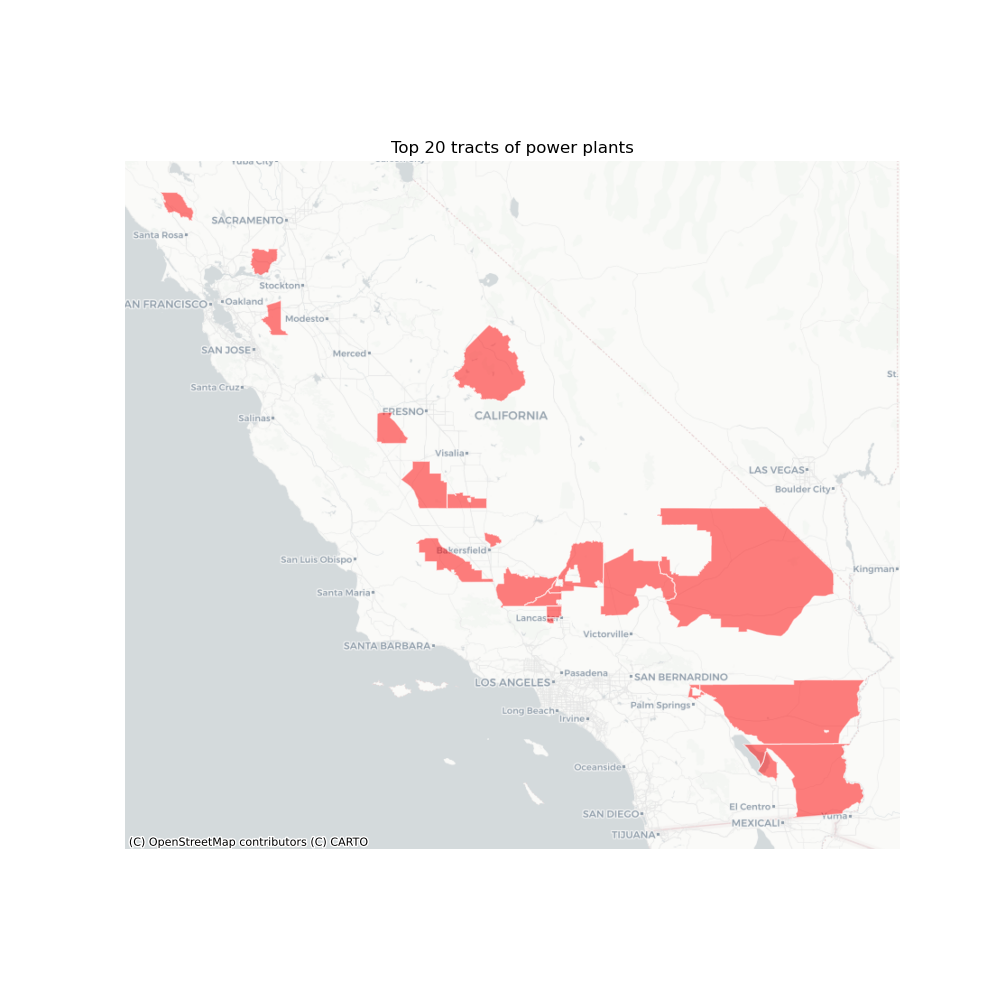

In [74]:
# map the top 20 census tracts
fig,ax = plt.subplots(figsize=(10,10))
ces_spatial.sort_values(by='powerplant_count',ascending=False)[:20].plot(ax=ax,
                                                                 color='red',
                                                                 edgecolor='white',
                                                                 alpha=0.5,
                                                                 legend=True)

# title
ax.set_title('Top 20 tracts of power plants')

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Spatial autocorrelation for all power plants

### Spatial lag for all power plants

In [75]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(ces_spatial,k=8)

# Row-standardization
wq.transform = 'r'

In [76]:
ces_spatial.sample(5)

FIPS       County  \
308  6.037503e+09  Los Angeles   
181  6.055202e+09         Napa   
120  6.073017e+09    San Diego   
135  6.069001e+09   San Benito   
153  6.019002e+09       Fresno   

                                              geometry  powerplant_count  
308  POLYGON ((-13143784.378 4020995.533, -13142524...                 1  
181  POLYGON ((-13620149.870 4698245.431, -13619936...                 1  
120  POLYGON ((-13045275.203 3908616.186, -13045150...                 1  
135  POLYGON ((-13499664.443 4411000.937, -13499595...                 1  
153  POLYGON ((-13333421.363 4398333.291, -13332576...                 1

In [77]:
# create a new column for the spatial lag
ces_spatial['powerplant_count_lag'] = lps.weights.lag_spatial(wq, ces_spatial['powerplant_count'])

In [78]:
# create a column that calculates the difference betwen powerplant counts and lag
ces_spatial['powerplant_count_lag_diff'] = ces_spatial['powerplant_count'] - ces_spatial['powerplant_count_lag']

In [79]:
# check work
ces_spatial.sample(10)[['FIPS','County','geometry','powerplant_count','powerplant_count_lag']]

FIPS           County  \
261  6.111005e+09          Ventura   
300  6.095253e+09           Solano   
177  6.079013e+09  San Luis Obispo   
95   6.067010e+09       Sacramento   
354  6.037408e+09      Los Angeles   
163  6.019006e+09           Fresno   
343  6.037980e+09      Los Angeles   
122  6.073006e+09        San Diego   
210  6.071007e+09   San Bernardino   
15   6.025011e+09         Imperial   

                                              geometry  powerplant_count  \
261  POLYGON ((-13260370.841 4058639.124, -13260393...                 1   
300  POLYGON ((-13577542.446 4630617.139, -13578078...                 1   
177  POLYGON ((-13363986.356 4232033.950, -13364021...                 3   
95   POLYGON ((-13519381.908 4645073.656, -13519346...                 1   
354  POLYGON ((-13138598.450 4033166.146, -13138594...                 1   
163  POLYGON ((-13310947.182 4398313.296, -13310954...                 1   
343  POLYGON ((-13160818.298 4005587.676, -13160699...                 3   
122  POLYGON ((-13044802.651 3860860.355, -13044480...                 1   
210  POLYGON ((-13053458.744 4036846.762, -13053476...                 1   
15   POLYGON ((-12881733.512 3876375.159, -12881732...                 2   

     powerplant_count_lag  
261                 1.250  
300                 3.125  
177                 4.875  
95                  1.125  
354                 1.125  
163                 1.125  
343                 1.375  
122                 1.500  
210                 1.625  
15                  3.875

In [80]:
# sort by lag differences
ces_spatial.sort_values(by='powerplant_count_lag_diff')

FIPS       County  \
79   6.029006e+09         Kern   
82   6.029003e+09         Kern   
64   6.029005e+09         Kern   
239  6.065046e+09    Riverside   
358  6.037901e+09  Los Angeles   
..            ...          ...   
11   6.025010e+09     Imperial   
70   6.029006e+09         Kern   
80   6.029003e+09         Kern   
280  6.001451e+09      Alameda   
73   6.029006e+09         Kern   

                                              geometry  powerplant_count  \
79   POLYGON ((-13174191.299 4226530.174, -13174154...                 4   
82   POLYGON ((-13265186.857 4212154.147, -13265191...                 1   
64   POLYGON ((-13094845.215 4272759.165, -13094912...                 1   
239  POLYGON ((-12757236.243 3976594.502, -12759779...                 1   
358  POLYGON ((-13161073.522 4121755.472, -13162037...                 1   
..                                                 ...               ...   
11   POLYGON ((-12859618.003 3927789.488, -12859565...                15   
70   POLYGON ((-13107923.252 4228827.260, -13108060...                19   
80   POLYGON ((-13319116.920 4231940.423, -13318798...                19   
280  POLYGON ((-13531658.667 4537635.963, -13531647...                25   
73   POLYGON ((-13201688.215 4180675.903, -13201685...                33   

     powerplant_count_lag  powerplant_count_lag_diff  
79                 10.500                     -6.500  
82                  6.000                     -5.000  
64                  5.875                     -4.875  
239                 5.875                     -4.875  
358                 5.500                     -4.500  
..                    ...                        ...  
11                  2.250                     12.750  
70                  5.125                     13.875  
80                  4.000                     15.000  
280                 1.750                     23.250  
73                  6.625                     26.375  

[359 rows x 6 columns]

<IPython.core.display.Javascript object>


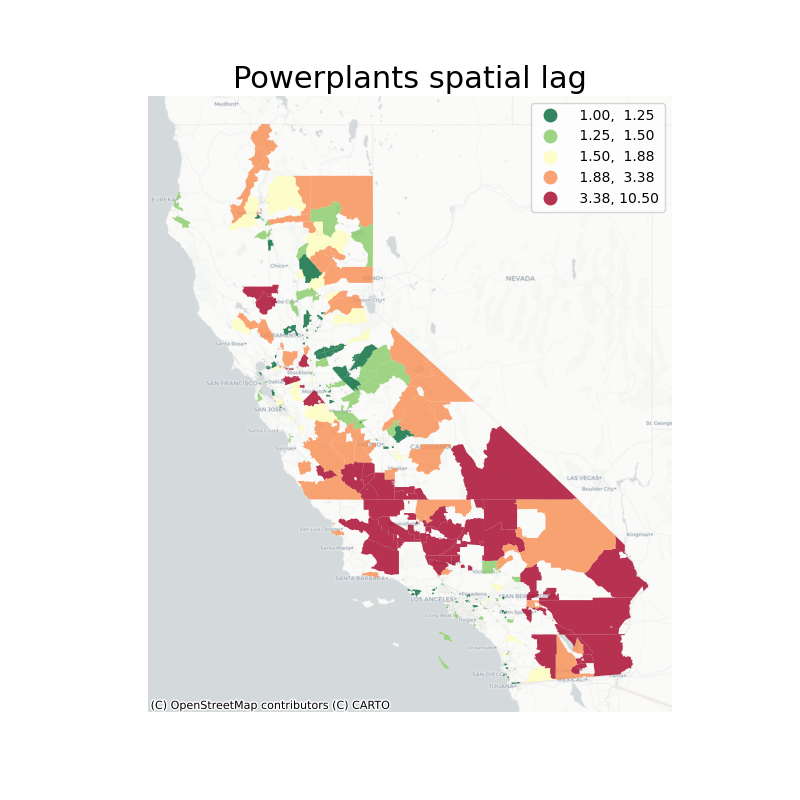

In [81]:
# plot the spatial lag with a chloropleth map
fig, ax = plt.subplots(figsize=(8, 8))

ces_spatial.plot(ax=ax,
         figsize=(15,15),
         column='powerplant_count_lag',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles')

ax.axis('off')
ax.set_title('Powerplants spatial lag',fontsize=22)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

### Moran's I Plot for all powerplants

In [82]:
y = ces_spatial.powerplant_count
moran = Moran(y, wq)
moran.I

0.1449023096112763

<IPython.core.display.Javascript object>


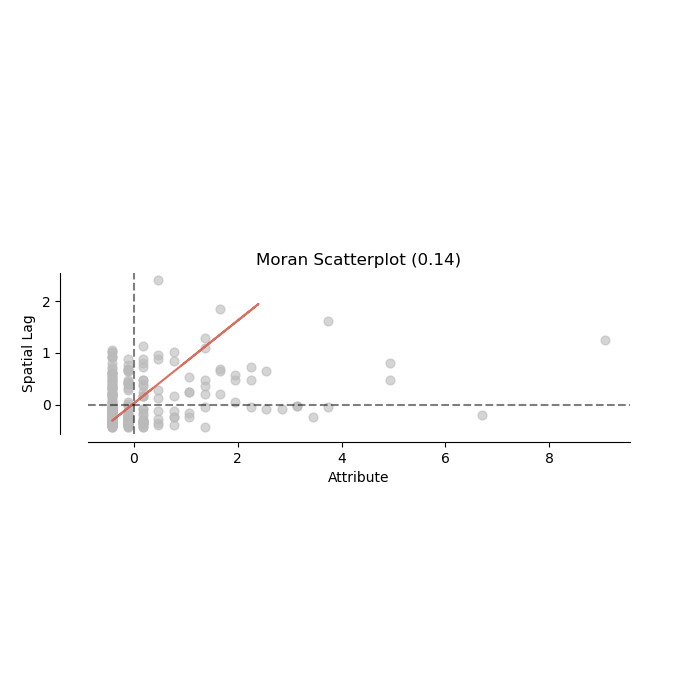

In [83]:
# Create a scatterplot of the Moran's plot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

We don't know if our value of 0.145 is statistically significant or not. To do that, we need to calculate the p-value.

In [84]:
moran.p_sim

0.001

This is a very low p-value, indicating that there's a 0.1% chance our data could be randomly arranged this way. It means our Moran's I-value is statistically significant.

We want to look at where clusters are. We'll use the Local Indicators of Spatial Association (LISA) model. LISA classifies areas into four groups: high values near to high values (HH), Low values with nearby low values (LL), Low values with high values in its neighborhood, and vice-versa.

In [85]:
# calculate local moran values
lisa = esda.moran.Moran_Local(y, wq)

<IPython.core.display.Javascript object>


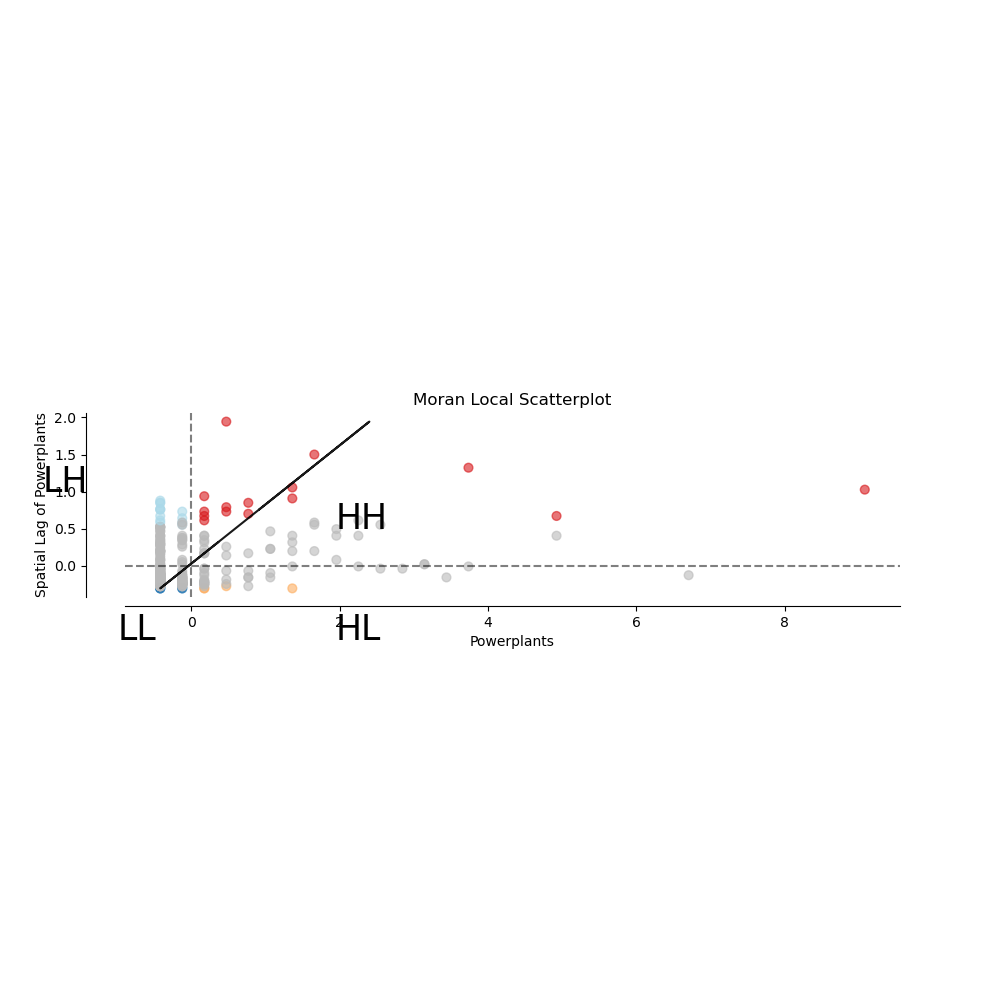

In [86]:
# Plot
fig,ax = plt.subplots(figsize=(10,10))

moran_scatterplot(lisa, ax=ax, p=0.05)
ax.set_xlabel("Powerplants")
ax.set_ylabel('Spatial Lag of Powerplants')

# add labels
plt.text(1.95, 0.5, "HH", fontsize=25)
plt.text(1.95, -1, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25)
plt.show()

In the scatterplot above, the yellow dots represent the census tract that have a P-value less that 0.05. We have several statistically significantly spatially autocorrelated geographies. Below, we'll visualize this.

<IPython.core.display.Javascript object>


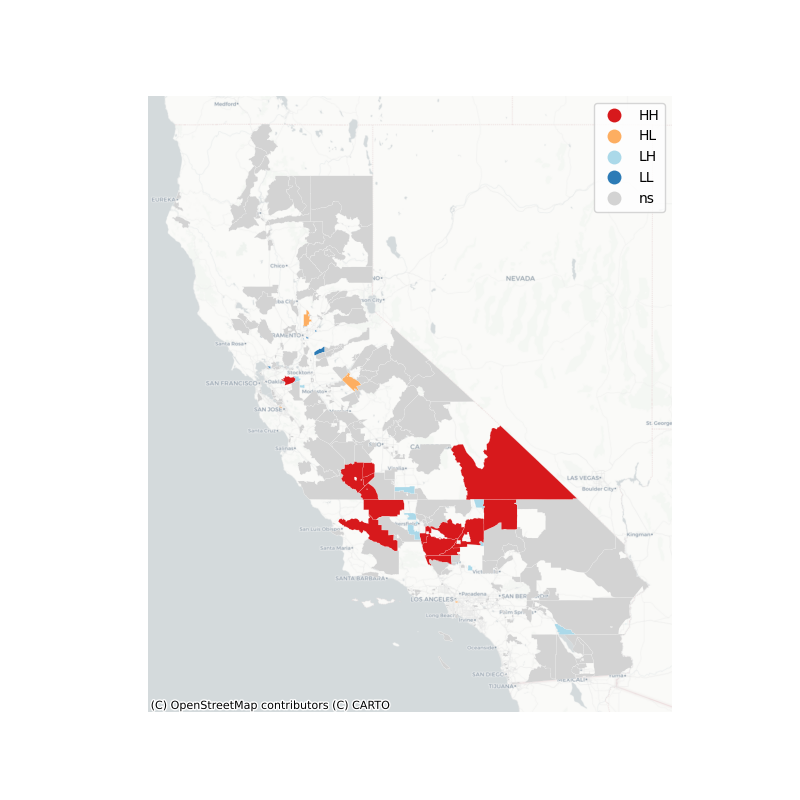

In [87]:
# use LISA cluster function
fig, ax = plt.subplots(figsize=(8,8))
lisa_cluster(lisa, ces_spatial, p=0.05, ax=ax)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.show()

## Fossil fuel spatial analysis

In [88]:
# create dataframe for fossil fuel energy
join_ff = join[join.Renewable_Energy != '1']

In [89]:
join_ff.shape

(316, 28)

In [90]:
# create new dataframe for grouping CPP data into tracts
ff_bytract_spatial = join_ff.FIPS.value_counts().rename_axis('FIPS').reset_index(name='ff_count')
ff_bytract_spatial.head(20)

FIPS  ff_count
0   6.029003e+09        12
1   6.029005e+09        12
2   6.037532e+09         7
3   6.013306e+09         7
4   6.029003e+09         6
5   6.013309e+09         5
6   6.085505e+09         4
7   6.019008e+09         4
8   6.073010e+09         4
9   6.073020e+09         4
10  6.095254e+09         3
11  6.031001e+09         3
12  6.037311e+09         3
13  6.037980e+09         3
14  6.101051e+09         3
15  6.001437e+09         3
16  6.071009e+09         3
17  6.037980e+09         3
18  6.013357e+09         2
19  6.073022e+09         2

In [91]:
# create new dataframe to run separate Moran's
ces_spatial_ff=ces_spatial.copy()

In [92]:
ces_spatial_ff.head()

FIPS         County  \
0  6.011000e+09         Colusa   
1  6.011000e+09         Colusa   
2  6.103001e+09         Tehama   
3  6.103000e+09         Tehama   
4  6.083003e+09  Santa Barbara   

                                            geometry  powerplant_count  \
0  POLYGON ((-13596135.250 4781220.115, -13595014...                 1   
1  POLYGON ((-13617812.940 4765808.759, -13617358...                 1   
2  POLYGON ((-13603222.851 4888123.896, -13602973...                 1   
3  POLYGON ((-13598180.189 4912134.917, -13597864...                 1   
4  POLYGON ((-13363759.041 4101027.008, -13363704...                 2   

   powerplant_count_lag  powerplant_count_lag_diff  
0                 3.625                     -2.625  
1                 3.625                     -2.625  
2                 1.250                     -0.250  
3                 1.375                     -0.375  
4                 2.000                      0.000

In [93]:
del ces_spatial_ff['powerplant_count']

In [94]:
del ces_spatial_ff['powerplant_count_lag']

In [95]:
del ces_spatial_ff['powerplant_count_lag_diff']

In [96]:
ces_spatial_ff.head()

FIPS         County  \
0  6.011000e+09         Colusa   
1  6.011000e+09         Colusa   
2  6.103001e+09         Tehama   
3  6.103000e+09         Tehama   
4  6.083003e+09  Santa Barbara   

                                            geometry  
0  POLYGON ((-13596135.250 4781220.115, -13595014...  
1  POLYGON ((-13617812.940 4765808.759, -13617358...  
2  POLYGON ((-13603222.851 4888123.896, -13602973...  
3  POLYGON ((-13598180.189 4912134.917, -13597864...  
4  POLYGON ((-13363759.041 4101027.008, -13363704...

In [97]:
# join the summary table to main gdf
ces_spatial_ff=ces_spatial_ff.merge(ff_bytract_spatial,on='FIPS')

In [98]:
ces_spatial_ff.head()

FIPS         County  \
0  6.011000e+09         Colusa   
1  6.103001e+09         Tehama   
2  6.083003e+09  Santa Barbara   
3  6.083003e+09  Santa Barbara   
4  6.083002e+09  Santa Barbara   

                                            geometry  ff_count  
0  POLYGON ((-13596135.250 4781220.115, -13595014...         1  
1  POLYGON ((-13603222.851 4888123.896, -13602973...         1  
2  POLYGON ((-13363759.041 4101027.008, -13363704...         2  
3  POLYGON ((-13343861.127 4086987.322, -13343824...         1  
4  POLYGON ((-13406850.927 4157523.436, -13406863...         1

<IPython.core.display.Javascript object>


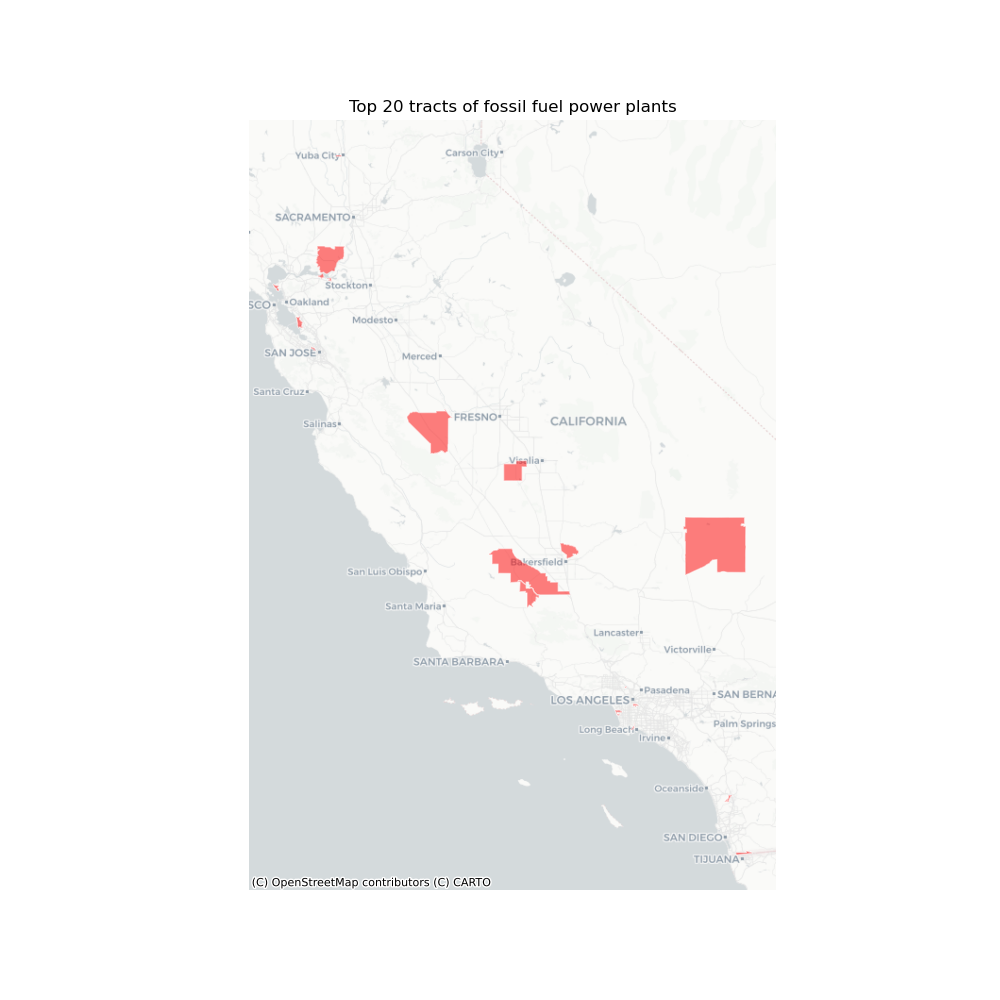

In [99]:
# map the top 20 census tracts
fig,ax = plt.subplots(figsize=(10,10))
ces_spatial_ff.sort_values(by='ff_count',ascending=False)[:20].plot(ax=ax,
                                                                 color='red',
                                                                 edgecolor='white',
                                                                 alpha=0.5,
                                                                 legend=True)

# title
ax.set_title('Top 20 tracts of fossil fuel power plants')

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

### Spatial lag for fossil fuel power plants

In [100]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(ces_spatial_ff,k=8)

# Row-standardization
wq.transform = 'r'

In [101]:
# create a new column for the spatial lag
ces_spatial_ff['ff_count_lag'] = lps.weights.lag_spatial(wq, ces_spatial_ff['ff_count'])

In [102]:
# create a column that calculates the difference betwen powerplant counts and lag
ces_spatial_ff['ff_count_lag_diff'] = ces_spatial_ff['ff_count'] - ces_spatial_ff['ff_count_lag']

In [103]:
# check work
ces_spatial_ff.sample(10)[['FIPS','County','geometry','ff_count','ff_count_lag']]

FIPS          County  \
3    6.083003e+09   Santa Barbara   
122  6.101051e+09          Sutter   
25   6.085505e+09     Santa Clara   
146  6.001451e+09         Alameda   
159  6.095253e+09          Solano   
104  6.071002e+09  San Bernardino   
74   6.089013e+09          Shasta   
50   6.073009e+09       San Diego   
136  6.013314e+09    Contra Costa   
157  6.095252e+09          Solano   

                                              geometry  ff_count  ff_count_lag  
3    POLYGON ((-13343861.127 4086987.322, -13343824...         1         2.000  
122  POLYGON ((-13545021.570 4741936.723, -13542122...         3         1.250  
25   POLYGON ((-13575255.567 4495339.419, -13575164...         1         1.750  
146  POLYGON ((-13531658.667 4537635.963, -13531647...         1         1.500  
159  POLYGON ((-13571581.844 4638500.582, -13569760...         1         1.750  
104  POLYGON ((-13086544.455 4028414.245, -13090412...         1         1.500  
74   POLYGON ((-13549613.734 5039428.189, -13546654...         1         1.500  
50   POLYGON ((-13041590.400 3873715.111, -13041380...         2         1.250  
136  POLYGON ((-13576044.086 4587596.497, -13575514...         1         2.375  
157  POLYGON ((-13591059.842 4598631.749, -13590622...         1         1.125

In [104]:
# sort by lag differences
ces_spatial_ff.sort_values(by='ff_count_lag_diff')

FIPS         County  \
32   6.029001e+09           Kern   
33   6.029001e+09           Kern   
44   6.107004e+09         Tulare   
4    6.083002e+09  Santa Barbara   
31   6.029006e+09           Kern   
..            ...            ...   
126  6.013309e+09   Contra Costa   
127  6.013306e+09   Contra Costa   
178  6.037532e+09    Los Angeles   
34   6.029005e+09           Kern   
35   6.029003e+09           Kern   

                                              geometry  ff_count  \
32   POLYGON ((-13238929.483 4224700.339, -13238530...         1   
33   POLYGON ((-13252404.039 4219224.678, -13252199...         1   
44   POLYGON ((-13284870.258 4289759.831, -13284854...         1   
4    POLYGON ((-13406850.927 4157523.436, -13406863...         1   
31   POLYGON ((-13201688.215 4180675.903, -13201685...         1   
..                                                 ...       ...   
126  POLYGON ((-13563351.437 4586770.600, -13563229...         5   
127  POLYGON ((-13553318.864 4582846.247, -13553317...         7   
178  POLYGON ((-13159887.635 4030901.752, -13159680...         7   
34   POLYGON ((-13253076.632 4239211.826, -13252543...        12   
35   POLYGON ((-13319116.920 4231940.423, -13318798...        12   

     ff_count_lag  ff_count_lag_diff  
32          4.500             -3.500  
33          4.500             -3.500  
44          4.125             -3.125  
4           3.250             -2.250  
31          3.125             -2.125  
..            ...                ...  
126         2.000              3.000  
127         1.750              5.250  
178         1.125              5.875  
34          3.125              8.875  
35          3.000              9.000  

[198 rows x 6 columns]

<IPython.core.display.Javascript object>


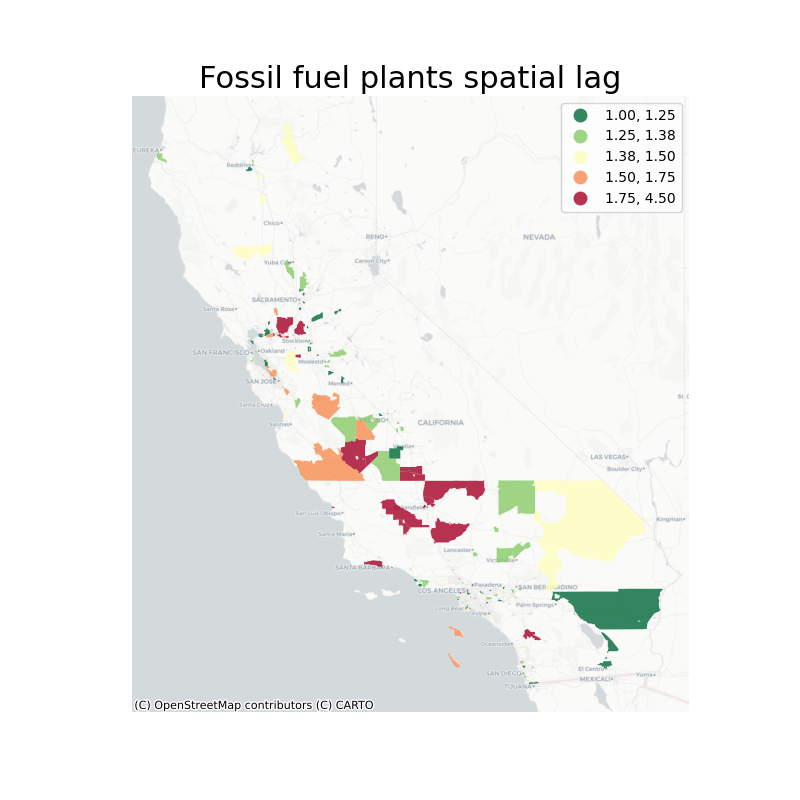

In [105]:
# plot the spatial lag with a chloropleth map
fig, ax = plt.subplots(figsize=(8, 8))

ces_spatial_ff.plot(ax=ax,
         figsize=(15,15),
         column='ff_count_lag',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles')

ax.axis('off')
ax.set_title('Fossil fuel plants spatial lag',fontsize=22)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

### Moran's I for fossil fuel plants

In [106]:
y = ces_spatial_ff.ff_count
moran = Moran(y, wq)
moran.I

0.08008411958622258

<IPython.core.display.Javascript object>


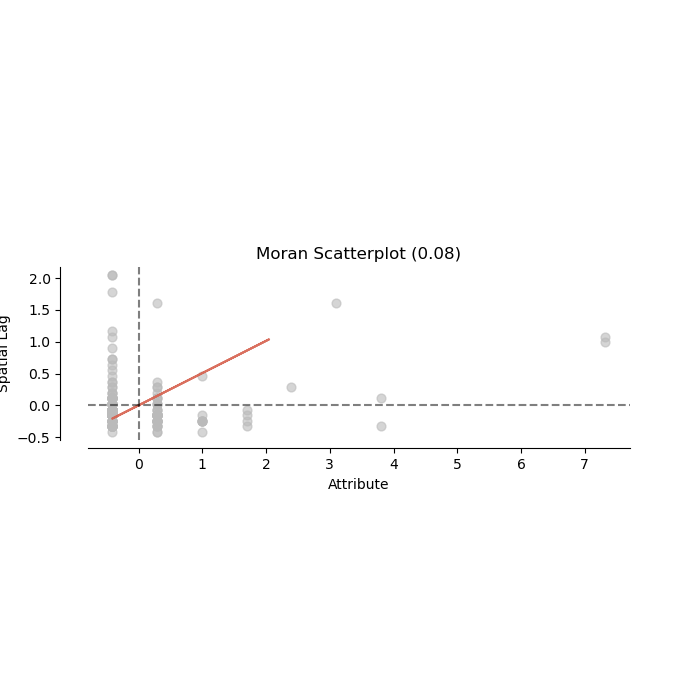

In [107]:
# Create a scatterplot of the Moran's plot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

In [108]:
# calculate p-value
moran.p_sim

0.01

In [109]:
# calculate local moran values
lisa = esda.moran.Moran_Local(y, wq)

<IPython.core.display.Javascript object>


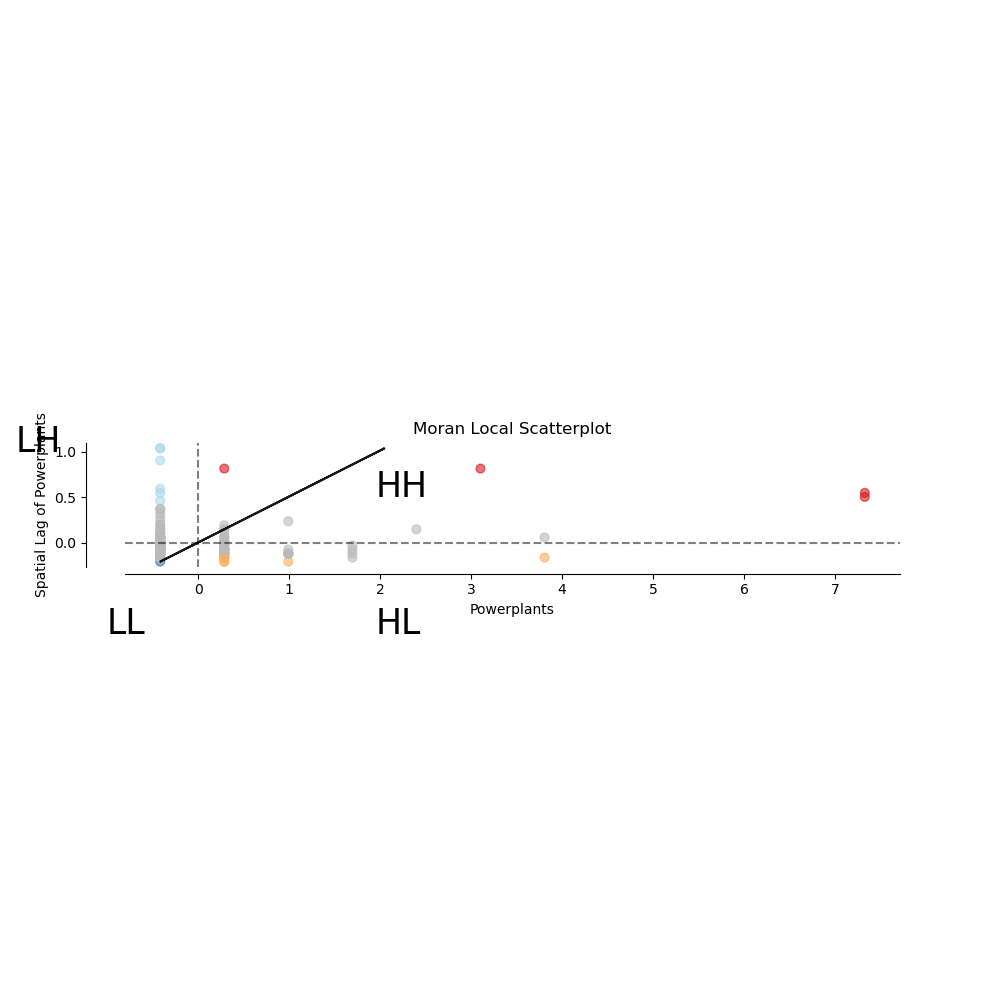

In [110]:
# Plot
fig,ax = plt.subplots(figsize=(10,10))

moran_scatterplot(lisa, ax=ax, p=0.05)
ax.set_xlabel("Powerplants")
ax.set_ylabel('Spatial Lag of Powerplants')

# add labels
plt.text(1.95, 0.5, "HH", fontsize=25)
plt.text(1.95, -1, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25)
plt.show()

<IPython.core.display.Javascript object>


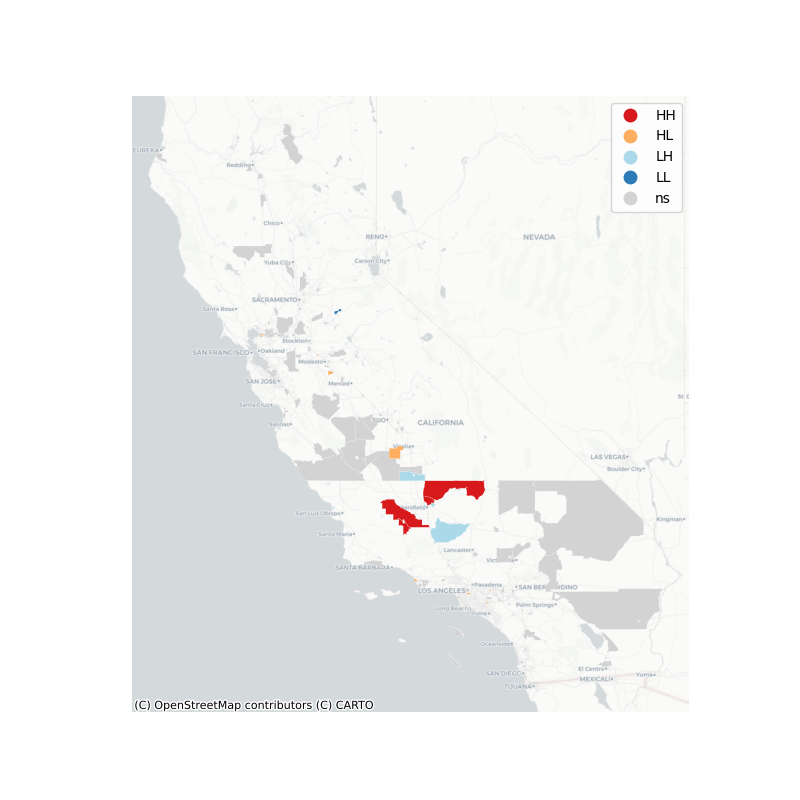

In [111]:
# use LISA cluster function
fig, ax = plt.subplots(figsize=(8,8))
lisa_cluster(lisa, ces_spatial_ff, p=0.05, ax=ax)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.show()

## Spatial analysis for clean energy plants

In [112]:
# create dataframe for clean energy
join_ce = join[join.Renewable_Energy == '1']

In [114]:
join_ce.shape

(555, 28)

In [115]:
# create new dataframe for grouping CPP data into tracts
ce_bytract_spatial = join_ce.FIPS.value_counts().rename_axis('FIPS').reset_index(name='ce_count')
ce_bytract_spatial.head(20)

FIPS  ce_count
0   6.029006e+09        32
1   6.001451e+09        24
2   6.029006e+09        19
3   6.029006e+09        15
4   6.025010e+09        15
5   6.097154e+09        14
6   6.065045e+09        11
7   6.019006e+09        11
8   6.095254e+09        10
9   6.065047e+09        10
10  6.107004e+09         9
11  6.071012e+09         9
12  6.031002e+09         9
13  6.025012e+09         9
14  6.037901e+09         8
15  6.037901e+09         8
16  6.037901e+09         8
17  6.019008e+09         8
18  6.065045e+09         8
19  6.071010e+09         8

In [116]:
# create new dataframe to run separate Moran's
ces_spatial_ce=ces_spatial.copy()

In [117]:
ces_spatial_ce.head()

FIPS         County  \
0  6.011000e+09         Colusa   
1  6.011000e+09         Colusa   
2  6.103001e+09         Tehama   
3  6.103000e+09         Tehama   
4  6.083003e+09  Santa Barbara   

                                            geometry  powerplant_count  \
0  POLYGON ((-13596135.250 4781220.115, -13595014...                 1   
1  POLYGON ((-13617812.940 4765808.759, -13617358...                 1   
2  POLYGON ((-13603222.851 4888123.896, -13602973...                 1   
3  POLYGON ((-13598180.189 4912134.917, -13597864...                 1   
4  POLYGON ((-13363759.041 4101027.008, -13363704...                 2   

   powerplant_count_lag  powerplant_count_lag_diff  
0                 3.625                     -2.625  
1                 3.625                     -2.625  
2                 1.250                     -0.250  
3                 1.375                     -0.375  
4                 2.000                      0.000

In [122]:
del ces_spatial_ce['powerplant_count']

In [123]:
del ces_spatial_ce['powerplant_count_lag']

In [124]:
del ces_spatial_ce['powerplant_count_lag_diff']

In [125]:
# join the summary table to main gdf
ces_spatial_ce=ces_spatial_ce.merge(ce_bytract_spatial,on='FIPS')

In [126]:
ces_spatial_ce.head()

FIPS         County  \
0  6.011000e+09         Colusa   
1  6.103000e+09         Tehama   
2  6.083002e+09  Santa Barbara   
3  6.025011e+09       Imperial   
4  6.025010e+09       Imperial   

                                            geometry  ce_count  
0  POLYGON ((-13617812.940 4765808.759, -13617358...         1  
1  POLYGON ((-13598180.189 4912134.917, -13597864...         1  
2  POLYGON ((-13367204.713 4179294.693, -13367167...         1  
3  POLYGON ((-12863235.460 3866335.408, -12863246...         1  
4  POLYGON ((-12837517.299 3895899.553, -12836977...         1

<IPython.core.display.Javascript object>


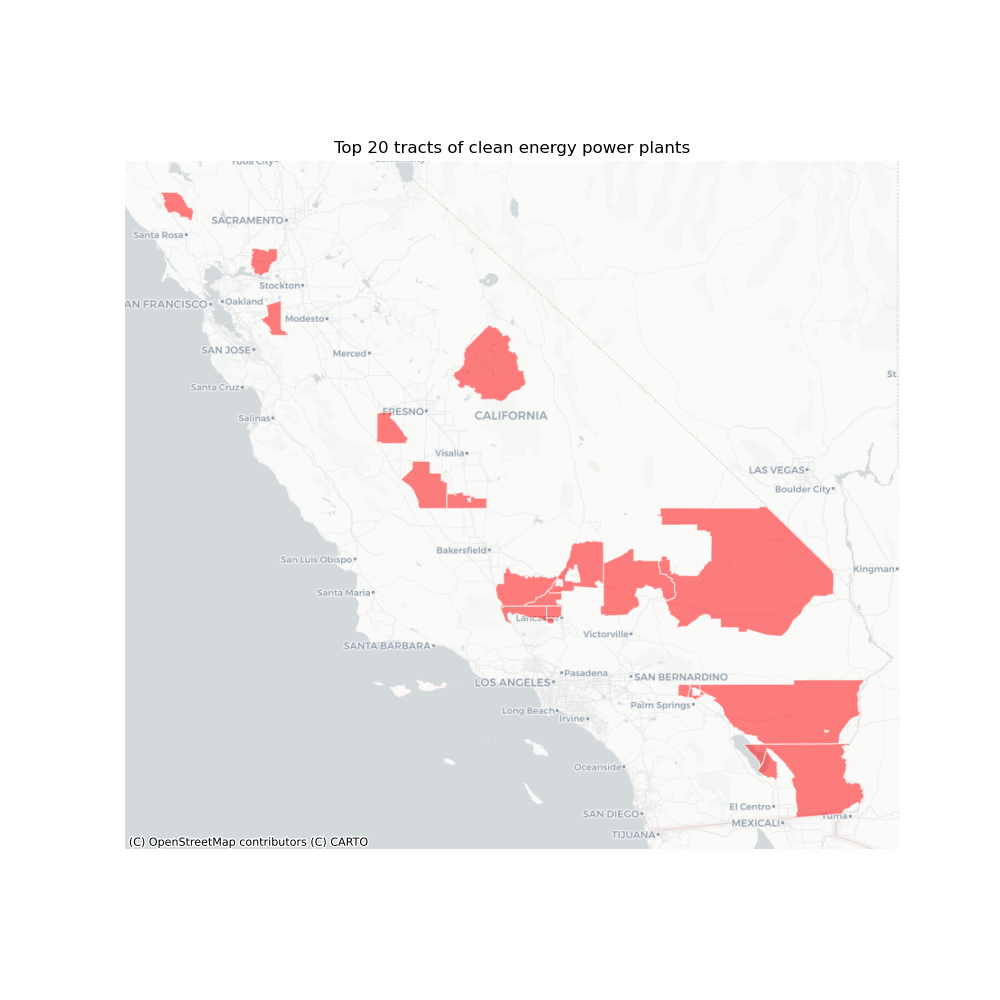

In [127]:
# map the top 20 census tracts
fig,ax = plt.subplots(figsize=(10,10))
ces_spatial_ce.sort_values(by='ce_count',ascending=False)[:20].plot(ax=ax,
                                                                 color='red',
                                                                 edgecolor='white',
                                                                 alpha=0.5,
                                                                 legend=True)

# title
ax.set_title('Top 20 tracts of clean energy power plants')

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

### Spatial weight for clean energy

In [130]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(ces_spatial_ce,k=8)

# Row-standardization
wq.transform = 'r'

In [131]:
# create a new column for the spatial lag
ces_spatial_ce['ce_count_lag'] = lps.weights.lag_spatial(wq, ces_spatial_ce['ce_count'])

In [132]:
# create a column that calculates the difference betwen powerplant counts and lag
ces_spatial_ce['ce_count_lag_diff'] = ces_spatial_ce['ce_count'] - ces_spatial_ce['ce_count_lag']

In [133]:
# check work
ces_spatial_ce.sample(10)[['FIPS','County','geometry','ce_count','ce_count_lag']]

FIPS          County  \
67   6.107004e+09          Tulare   
103  6.035041e+09          Lassen   
0    6.011000e+09          Colusa   
145  6.017031e+09       El Dorado   
180  6.037405e+09     Los Angeles   
114  6.057001e+09          Nevada   
91   6.043000e+09        Mariposa   
85   6.089012e+09          Shasta   
147  6.109003e+09        Tuolumne   
119  6.071025e+09  San Bernardino   

                                              geometry  ce_count  ce_count_lag  
67   POLYGON ((-13284870.258 4289759.831, -13284854...         9         3.625  
103  POLYGON ((-13384916.980 4919788.454, -13384963...         1         1.500  
0    POLYGON ((-13617812.940 4765808.759, -13617358...         1         3.250  
145  POLYGON ((-13444239.582 4690639.106, -13443607...         1         1.875  
180  POLYGON ((-13127836.082 4047682.171, -13127842...         2         1.000  
114  MULTIPOLYGON (((-13458060.611 4762957.267, -13...         2         1.625  
91   POLYGON ((-13366922.073 4555153.999, -13366783...         1         1.500  
85   POLYGON ((-13649473.025 4994810.108, -13649761...         3         2.000  
147  POLYGON ((-13383940.486 4579193.715, -13383824...         1         1.500  
119  POLYGON ((-12761301.853 4148821.421, -12761306...         1         4.750

In [134]:
# sort by lag differences
ces_spatial_ce.sort_values(by='ce_count_lag_diff')

FIPS        County  \
51   6.029006e+09          Kern   
53   6.029003e+09          Kern   
49   6.029001e+09          Kern   
143  6.013309e+09  Contra Costa   
107  6.081614e+09     San Mateo   
..            ...           ...   
35   6.097154e+09        Sonoma   
6    6.025010e+09      Imperial   
45   6.029006e+09          Kern   
160  6.001451e+09       Alameda   
48   6.029006e+09          Kern   

                                              geometry  ce_count  \
51   POLYGON ((-13174191.299 4226530.174, -13174154...         4   
53   POLYGON ((-13265186.857 4212154.147, -13265191...         1   
49   POLYGON ((-13237474.431 4208170.891, -13237470...         1   
143  POLYGON ((-13563351.437 4586770.600, -13563229...         1   
107  POLYGON ((-13625463.149 4519295.845, -13624946...         1   
..                                                 ...       ...   
35   POLYGON ((-13689375.588 4700383.202, -13688715...        14   
6    POLYGON ((-12859618.003 3927789.488, -12859565...        15   
45   POLYGON ((-13107923.252 4228827.260, -13108060...        19   
160  POLYGON ((-13531658.667 4537635.963, -13531647...        24   
48   POLYGON ((-13201688.215 4180675.903, -13201685...        32   

     ce_count_lag  ce_count_lag_diff  
51         10.125             -6.125  
53          6.750             -5.750  
49          6.500             -5.500  
143         5.500             -4.500  
107         5.500             -4.500  
..            ...                ...  
35          2.750             11.250  
6           3.125             11.875  
45          5.000             14.000  
160         1.625             22.375  
48          6.625             25.375  

[194 rows x 6 columns]

<IPython.core.display.Javascript object>


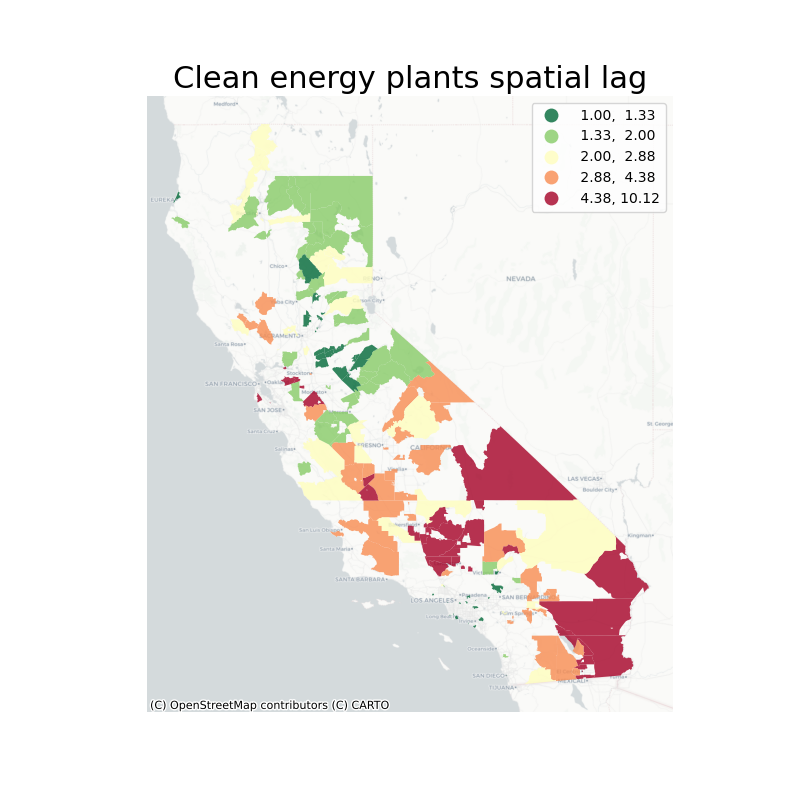

In [135]:
# plot the spatial lag with a chloropleth map
fig, ax = plt.subplots(figsize=(8, 8))

ces_spatial_ce.plot(ax=ax,
         figsize=(15,15),
         column='ce_count_lag',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles')

ax.axis('off')
ax.set_title('Clean energy plants spatial lag',fontsize=22)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

### Moran's I for clean energy

In [137]:
y = ces_spatial_ce.ce_count
moran = Moran(y, wq)
moran.I

0.1211144401273896

<IPython.core.display.Javascript object>


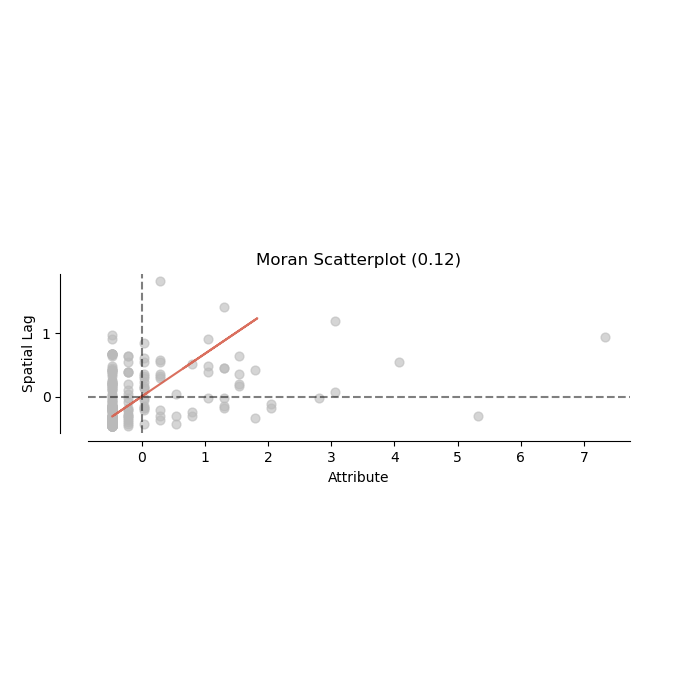

In [138]:
# Create a scatterplot of the Moran's plot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

In [139]:
moran.p_sim

0.001

In [140]:
# calculate local moran values
lisa = esda.moran.Moran_Local(y, wq)

<IPython.core.display.Javascript object>


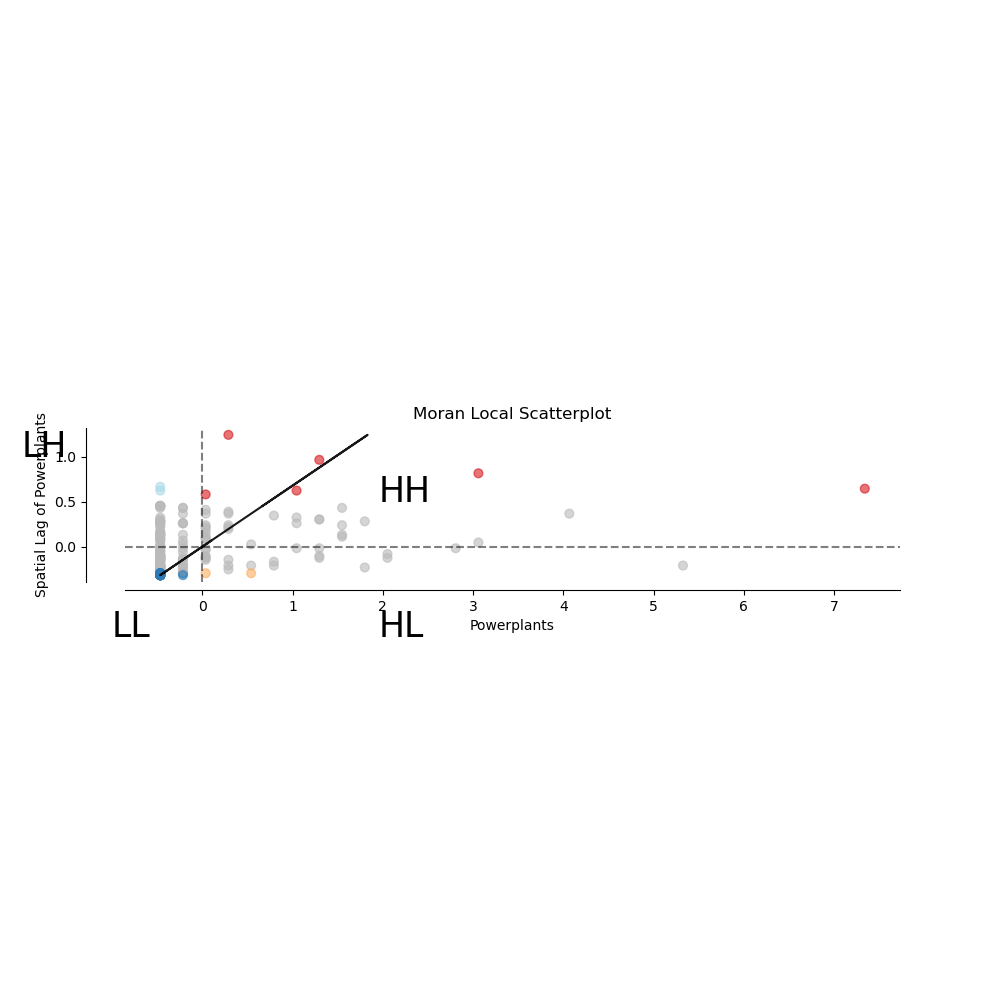

In [141]:
# Plot
fig,ax = plt.subplots(figsize=(10,10))

moran_scatterplot(lisa, ax=ax, p=0.05)
ax.set_xlabel("Powerplants")
ax.set_ylabel('Spatial Lag of Powerplants')

# add labels
plt.text(1.95, 0.5, "HH", fontsize=25)
plt.text(1.95, -1, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25)
plt.show()

<IPython.core.display.Javascript object>


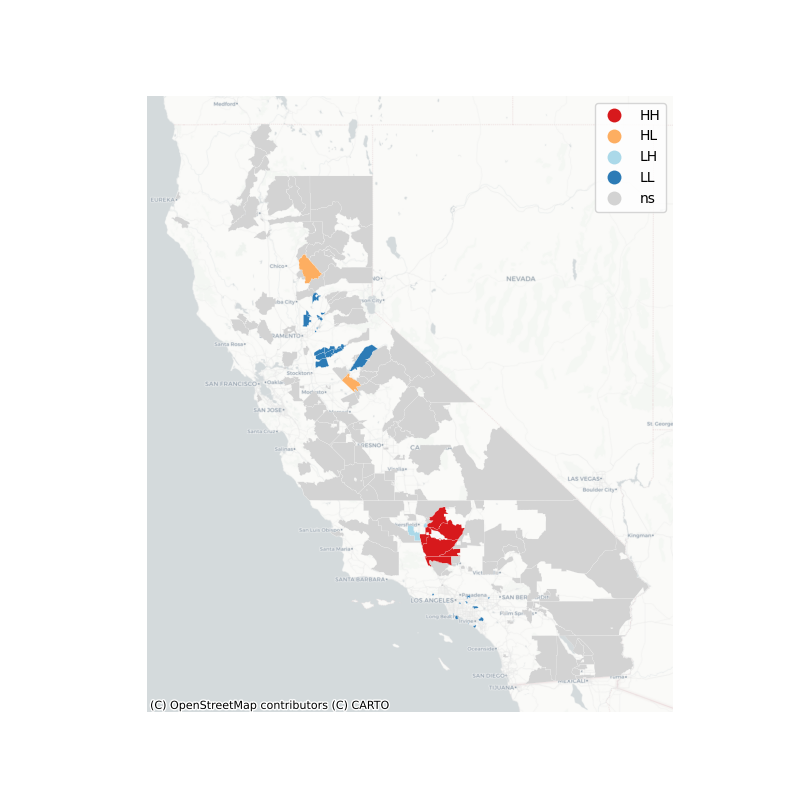

In [143]:
# use LISA cluster function
fig, ax = plt.subplots(figsize=(8,8))
lisa_cluster(lisa, ces_spatial_ce, p=0.05, ax=ax)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
plt.show()